# Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Carga del dataset `diamonds` de Seaborn
2. Un **análisis exploratorio** preliminar para los datos
3. Se crean visualizaciones con:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizacion de `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Utilizacion de `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajuste de los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
#1. Carga del dataset diamonds de Seaborn.

diamantes = sns.load_dataset('diamonds')

In [4]:
# 2. Análisis exploratorio preliminar para los datos.

# Muestra las primeras filas del DataFrame.
print(diamantes.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:
# Dimensiones del DataFrame.
print(diamantes.shape)

(53940, 10)


In [6]:
# Información sobre los tipos de datos y valores faltantes.
print(diamantes.info)

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>


In [7]:
# Estadísticas descriptivas.
diamantes.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# Número de valores únicos por columna.
print(diamantes.nunique)

<bound method DataFrame.nunique of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>


In [9]:
# Verificar valores faltantes.
print(diamantes.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [10]:
# Porcentaje de valores faltantes por columna.
print(diamantes.isnull().mean() * 100)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64


In [11]:
# Eliminar filas duplicadas.
diamantes.drop_duplicates(inplace=True)
print(diamantes)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]


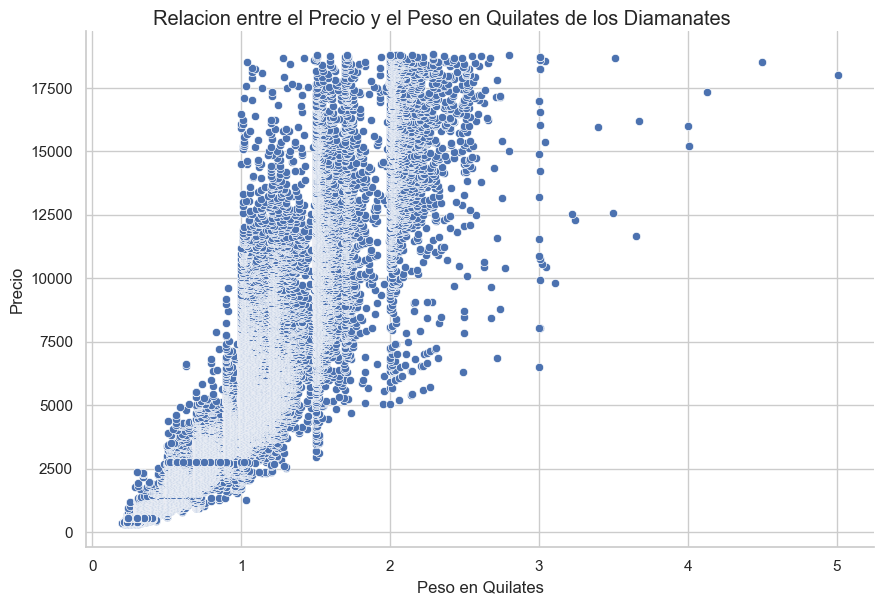

In [12]:
# 3. Creacion de visualizaciones
# Relaciones(relplot) entre variables numéricas (por ejemplo, precio vs. peso en quilates)
sns.set(style="whitegrid")

# Creando el grafico de relacion con relplot
g  = sns.relplot(data=diamantes,
                x='carat',
                y='price',
                kind='scatter',
                height=6,
                aspect=1.5)

# Estableciendo el titulo.
g.fig.suptitle("Relacion entre el Precio y el Peso en Quilates de los Diamanates",
              va='baseline',
              ha='center')

# Estableciendo tieulos para las etiquetas de ejes.
g.set_axis_labels('Peso en Quilates', 'Precio');

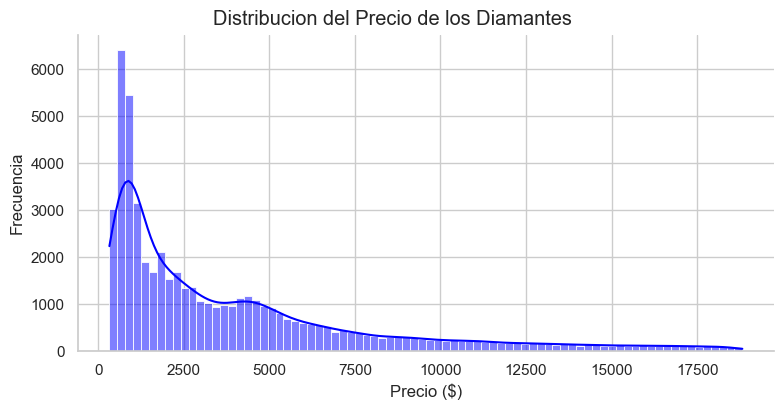

In [14]:
# Distribuciones(displot) de variables numéricas (por ejemplo, precio, peso en quilates)

g = sns.displot(data=diamantes,
               x='price',
               kind='hist',
               kde=True,
               color='blue',
               height=4,
               aspect=2)

# Estableciendo el titulo.
g.fig.suptitle("Distribucion del Precio de los Diamantes",
              va='baseline',
              ha='center')

# Estableciendo tieulos para las etiquetas de ejes.
g.set_axis_labels('Precio ($)',
                 'Frecuencia');

In [ ]:
# Comparaciones(hisplot) de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
g  = sns.histplot(data=diamantes,
                 x='carat',
                 kde=True,
                 color='green')
g.set_title('Dist')

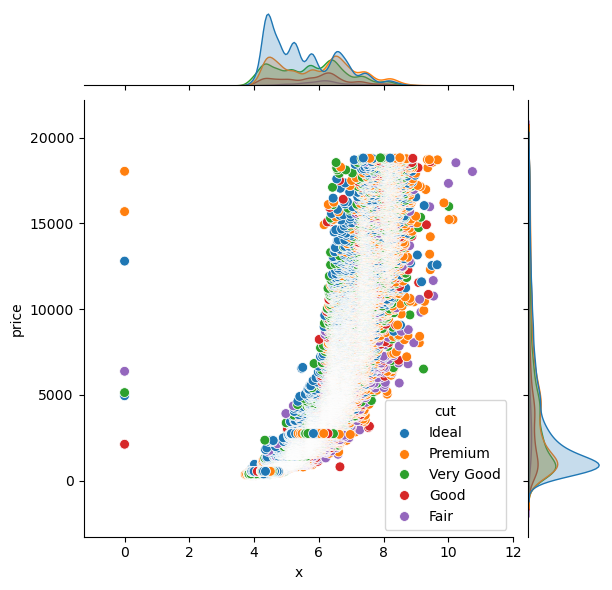

In [19]:
# 4. Utilizacion de jointplot() para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional.

sns.jointplot(data=diamantes,
             x='x',
             y='price',
             hue='cut',
             marker='o',
             s=50);

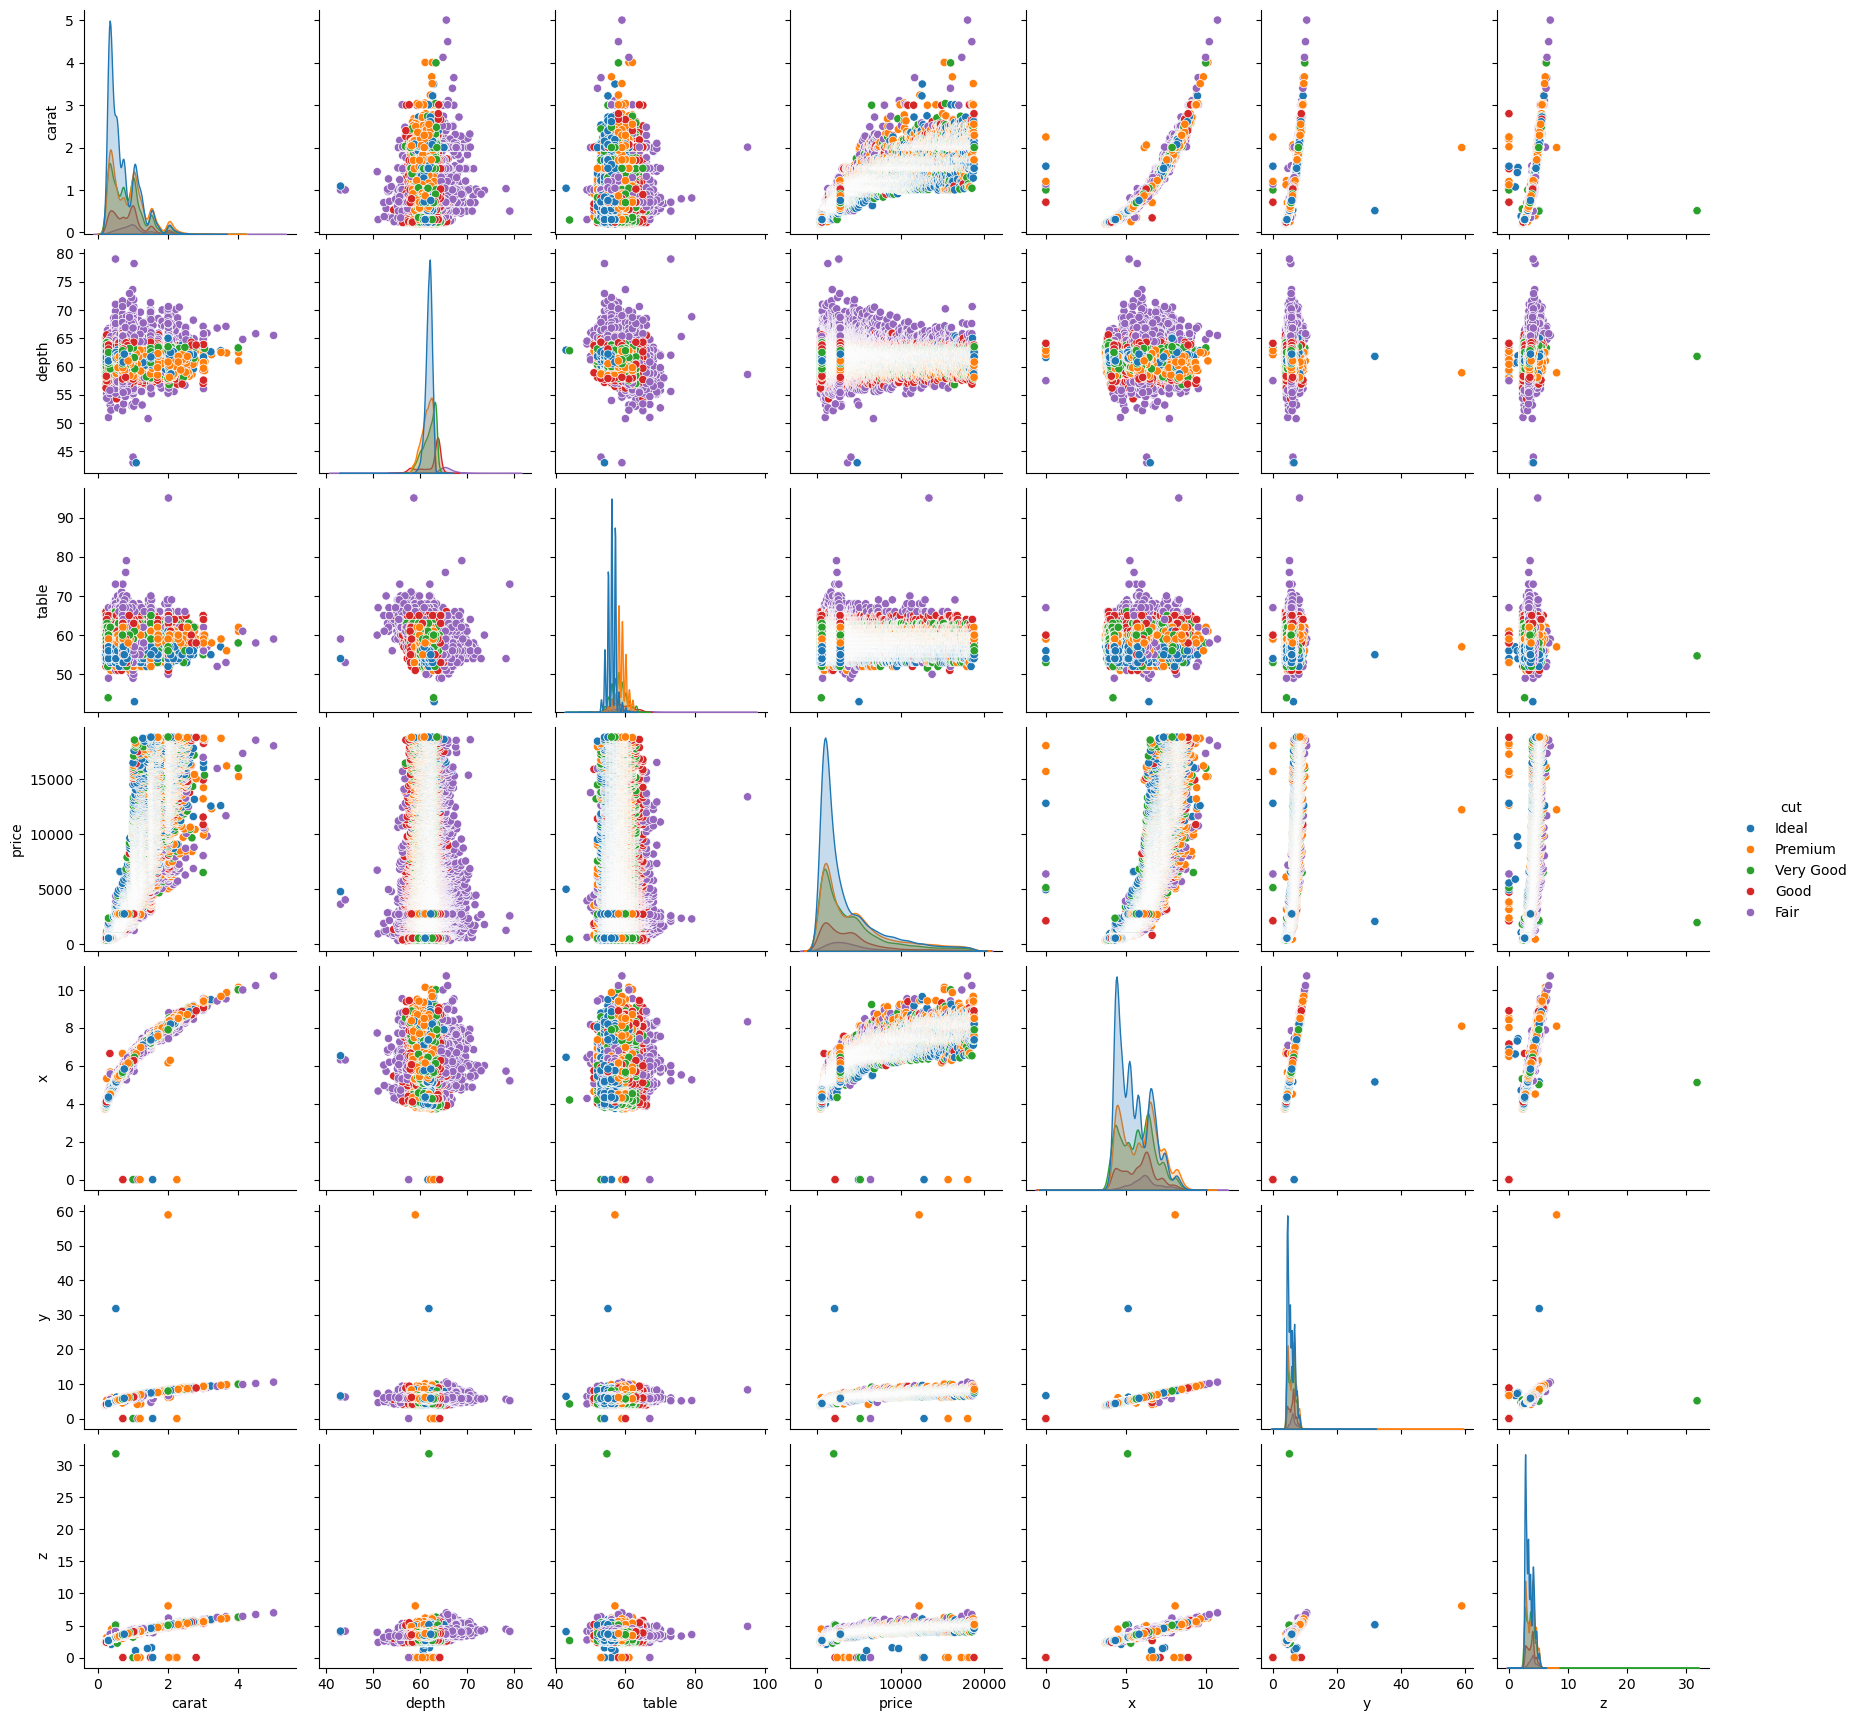

In [5]:
# 5. Utilizacion de pairplot() para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta.

import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset diamonds directamente si está disponible
diamantes = sns.load_dataset('diamonds')

# Pairplot
sns.pairplot(data=diamantes, hue='cut')
plt.show()